In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

In [49]:
# Read the cleaned CSV file
guns15_17 = pd.read_csv("Recoded-Race.csv", low_memory=False)

In [50]:
# Review the data
guns15_17.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
0,0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X72,White,X72
1,1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72
2,2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X74,White,X74
3,3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,...,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95,Black,X95
4,4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72


In [51]:
# Perform some more data cleanup Rename American Indian to NAtive American and group Asian and Asian or Pacific Islander into one
guns15_17['Causes_of_Death'] = guns15_17['Causes_of_Death'].str.lower()
guns15_17.replace({'American Indian': 'Native American'}, inplace=True)
guns15_17.replace({'Asian': 'Asian or Pacific Islander'}, inplace=True)

In [52]:
#Check data
guns15_17.count()

Unnamed: 0                115065
Unnamed: 0.1              115065
Resident_Status           115065
Month_Of_Death            115065
Sex                       115065
Age                       115065
Age_Group                 115065
Place_Of_Death            115065
Marital_Status            115065
DOW_of_Death              115065
Data_Year                 115065
Injured_At_Work           115065
Manner_Of_Death           115008
Activity_Code             113381
Place_Of_Causal_Injury    113450
Race                      115065
Hispanic_Origin           115065
Causes_of_Death           115065
ICD10                     115065
Race-Simplified           115065
ICD10-Description         115065
dtype: int64

In [53]:
# Perform a groupby race
guns15_17byrace = guns15_17.groupby(['Race-Simplified'])


In [62]:
# Get total gun deaths by race
totalbyrace = guns15_17byrace['Race-Simplified'].count()
dftotalbyrace = pd.DataFrame(totalbyrace)
dftotalbyrace.columns = ['Totals']
dftotalbyrace


,Totals
Race-Simplified,
Asian or Pacific Islander,1712
Black,29165
Hispanic,9846
Native American,1169
White,73173


In [45]:
# Get breakdown of deaths by race by causes
guns15_17bybd = guns15_17byrace["Causes_of_Death"].value_counts()
guns15_17bybd

Race-Simplified            Causes_of_Death                            
Asian or Pacific Islander  suicide by firearms                             1007
                           assault (homicide) by discharge of firearms      633
                           legal intervention                                41
                           accidental discharge of firearms                  21
                           discharge of firearms                             10
Black                      assault (homicide) by discharge of firearms    24315
                           suicide by firearms                             3960
                           legal intervention                               389
                           accidental discharge of firearms                 311
                           discharge of firearms                            190
Hispanic                   assault (homicide) by discharge of firearms     5952
                           suicide by firearms   

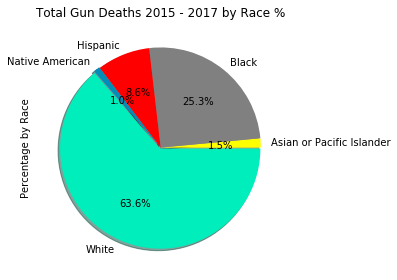

In [9]:
# Plot percantage of total deaths by race
totalraceplot = totalbyrace.plot.pie( shadow=True, explode=(0,0,0,0.01,0.01), colors = ['yellow', 'gray', 'red', '#008DB8', '#00EEBB'], autopct='%1.1f%%') 
plt.ylabel('Percentage by Race')
plt.title("Total Gun Deaths 2015 - 2017 by Race %")
plt.tight_layout()
plt.savefig('imran_plot-images/totalgun_deaths_by_race_2015-2017-bar.png')

In [10]:
# Filter gun deaths by Legal Intervention 
guns15_17byLI = guns15_17.loc[guns15_17['Causes_of_Death']=="legal intervention"]

In [11]:
guns15_17byLI.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
129,129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,...,N,Homicide,NaN,NaN,Native American,Non - Hispanic other races,legal intervention,Y350,Native American,Y350
142,142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
279,279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
628,628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
770,770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350


In [12]:
# Filter Legal Intervention by race
guns15_17byLIbyrace= guns15_17byLI.groupby(['Race-Simplified'])
racecount = guns15_17byLIbyrace['Race-Simplified'].count()
guns15_17byLIbyrace.head(10)

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
129,129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,...,N,Homicide,NaN,NaN,Native American,Non - Hispanic other races,legal intervention,Y350,Native American,Y350
142,142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
279,279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
628,628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
770,770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
823,823,823,Residents,September,M,57,55 - 64,Unknown,M,Friday,...,N,Homicide,Other Activity,Street and Highway,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1402,1402,1402,Residents,July,M,49,45 - 54,Decendents Home,D,Tuesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1616,1616,1616,Residents,May,M,42,35 - 44,Outpatient Hospital,M,Friday,...,Y,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1714,1714,1714,Intra_state_NR,January,M,29,25 - 34,Outpatient Hospital,M,Tuesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1745,1745,1745,Residents,February,M,55,55 - 64,Other,M,Monday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350


In [66]:
# Display Legal interventions death totals by race
guns15_17LIbybd = guns15_17byLIbyrace["Causes_of_Death"].value_counts()
dfguns15_17LIbybd = pd.DataFrame(guns15_17LIbybd)
dfguns15_17LIbybd.columns = ['Totals']
dfguns15_17LIbybd

,,Totals
Race-Simplified,Causes_of_Death,
Asian or Pacific Islander,legal intervention,41
Black,legal intervention,389
Hispanic,legal intervention,259
Native American,legal intervention,51
White,legal intervention,958


In [70]:
# Calculate legal interventions deaths by race by percentage of totals by race
percentLioftotalbyrace = (guns15_17LIbypa/totalbyrace*100).round(2)
dfpercentLioftotalbyrace = pd.DataFrame(percentLioftotalbyrace)
dfpercentLioftotalbyrace.columns = ['% of total deaths']
dfpercentLioftotalbyrace

,,% of total deaths
Race-Simplified,Causes_of_Death,
Asian or Pacific Islander,legal intervention,2.39
Black,legal intervention,1.33
Hispanic,legal intervention,2.63
Native American,legal intervention,4.36
White,legal intervention,1.31


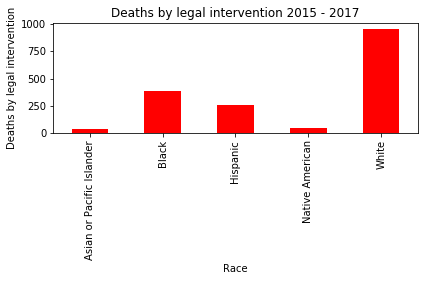

In [18]:
# Plot deaths by Legal Intervention by race
lichart = racecount.plot(kind='bar', color='red')
lichart.set_xlabel("Race")
lichart.set_ylabel("Deaths by legal intervention")
plt.title("Deaths by legal intervention 2015 - 2017")
plt.tight_layout()
plt.savefig('imran_plot-images/legalinterventions_deaths_2015-2017-bar.png')

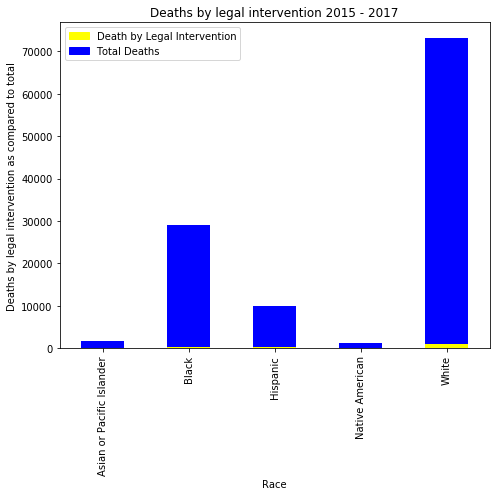

In [16]:
# Plot deaths by Legal Intervention by race compared to tals gun deaths
totalichart = totalbyrace.plot(kind='bar',figsize=(7,7), color='blue')
lichart = racecount.plot(kind='bar', color='Yellow')
lichart.set_xlabel("Race")
lichart.set_ylabel("Deaths by legal intervention as compared to total")
yellow_patch = mpatches.Patch(color='yellow', label='Death by Legal Intervention')
blue_patch = mpatches.Patch(color='blue', label='Total Deaths')
plt.legend(handles=[yellow_patch, blue_patch])
plt.title("Deaths by legal intervention 2015 - 2017")
plt.tight_layout()
plt.savefig('imran_plot-images/pct-legalinterventions_deaths_2015-2017-bar.png')

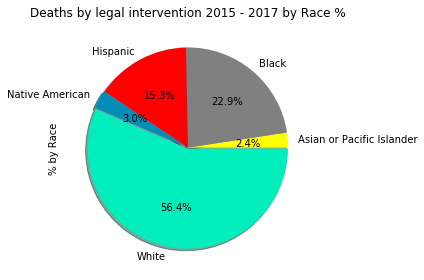

In [72]:
# Percentage breakdown of total police intervention deaths by race
piechartbyrace = racecount.plot.pie(shadow=True, explode=(0,0,0,0.01,0.01), colors = ['yellow','gray','red','#008DB8','#00EEBB'], autopct='%1.1f%%') 
plt.ylabel('% by Race')
plt.title("Deaths by legal intervention 2015 - 2017 by Race %")
plt.tight_layout()
plt.savefig('imran_plot-images/legalinterventions_deaths_2015-2017-pie.png')